In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer, precision_score, recall_score, accuracy_score
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the preprocessed data from CSV files
dataset = pd.read_csv('../data/updated_preprocessed_dataset1.csv')

In [3]:
# Impute missing values in features
X_imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(X_imputer.fit_transform(dataset.drop(['writing_score'], axis=1)), columns=dataset.drop(['writing_score'], axis=1).columns)

In [4]:
# Impute missing values in the target variable
y_imputer = SimpleImputer(strategy='mean')
y_imputed = pd.DataFrame(y_imputer.fit_transform(dataset['writing_score'].values.reshape(-1, 1)), columns=['writing_score'])


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed['writing_score'], test_size=0.2, random_state=42)


In [6]:
# Initialize models with hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0]}),
    'Lasso Regression': (Lasso(), {'alpha': [0.01, 0.1, 1.0, 10.0]}),
    'Decision Tree Regressor': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest Regressor': (RandomForestRegressor(), {'n_estimators': [50, 100, 200]}),
    'Support Vector Regression': (SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']})
}

In [7]:
# Initialize the best model and its performance
best_model = None
best_model_name = None
best_mse = float('inf')

In [30]:
# Dictionary to store evaluation metrics
evaluation_metrics = {'Model': [], 'Mean Squared Error': [], 'Mean Absolute Error': [], 'R-squared': [],
                      'Precision': [], 'Recall': [], 'Accuracy': []}

In [33]:
# Perform hyperparameter tuning and cross-validation for each model
for model_name, (model, param_grid) in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring=mse_scorer)
    grid_search.fit(X_train, y_train)

    # Evaluate the best model using test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Store metrics in the dictionary
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['Mean Squared Error'].append(mse)
    evaluation_metrics['Mean Absolute Error'].append(mae)
    evaluation_metrics['R-squared'].append(r_squared)

    # Check if this is the best model so far
    if mse < best_mse:
        best_mse = mse
        best_model = grid_search.best_estimator_
        best_model_name = model_name


In [10]:
# Save the best model
joblib.dump(best_model, '../ml_models/best_student_performance_model1.pkl')

['../ml_models/best_student_performance_model1.pkl']

In [11]:
# Print the best model and its performance
print(f'Best Model: {best_model_name}')
print(f'Mean Squared Error: {best_mse}')

Best Model: Random Forest Regressor
Mean Squared Error: 21.362620400667666


In [12]:
# Create a DataFrame from the evaluation metrics
metrics_df = pd.DataFrame(evaluation_metrics)

In [13]:
# Plotting EDA figures
# For example, let's create a pairplot for a subset of features
subset_features = ['math_score', 'reading_score', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [27]:
# Display the evaluation metrics
print("Evaluation Metrics:")
metrics_df

Evaluation Metrics:


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,21.802868,3.454032,0.920979
1,Ridge Regression,21.796242,3.453290,0.921003
2,Lasso Regression,21.780073,3.448322,0.921062
3,Decision Tree Regressor,33.024952,4.529975,0.880307
4,Random Forest Regressor,21.362620,3.615986,0.922575
5,Support Vector Regression,21.940578,3.411622,0.920480


In [28]:
print("Best Model Name")
best_model_name

Best Model Name


'Random Forest Regressor'

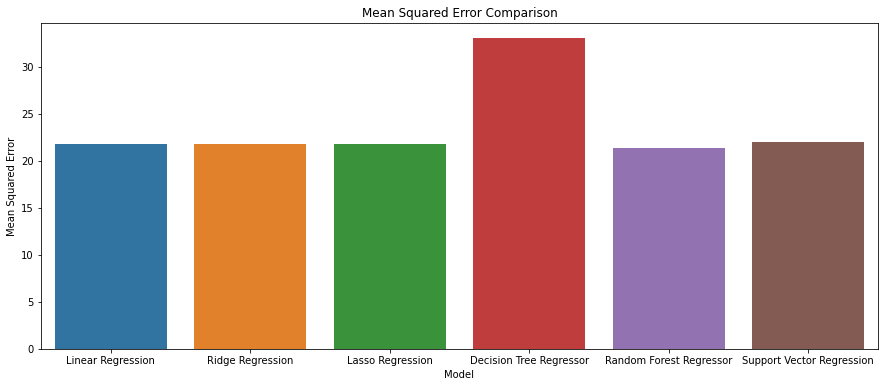

In [19]:
# Plot a bar chart for Mean Squared Error
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Mean Squared Error', data=metrics_df)
plt.title('Mean Squared Error Comparison')
plt.show()

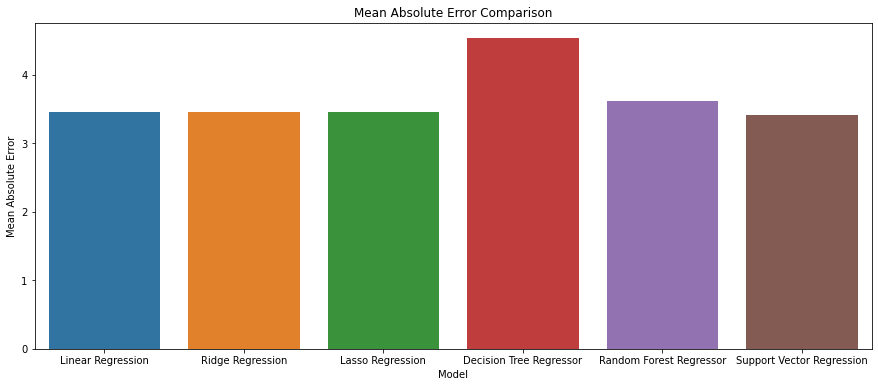

In [21]:
# Plot a bar chart for Mean Absolute Error
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Mean Absolute Error', data=metrics_df)
plt.title('Mean Absolute Error Comparison')
plt.show()

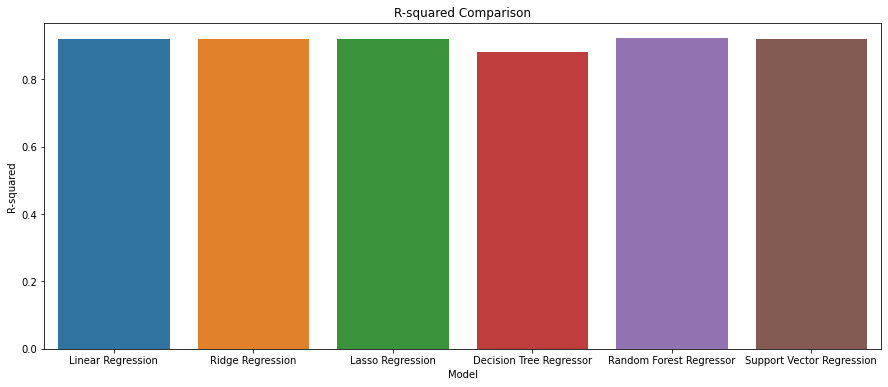

In [22]:
# Plot a bar chart for R-squared
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='R-squared', data=metrics_df)
plt.title('R-squared Comparison')
plt.show()